In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

df = pd.read_csv('../datasets/global_electricity_stats.csv')
df.head()

,Country,Features,Region,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Algeria,net generation,Africa,6.683,7.65,8.824,9.615,10.537,11.569,12.214,...,53.9845,56.3134,60.39972,64.68244,66.75504,71.49546,72.10903,76.685,72.73591277,77.53072719
1,Angola,net generation,Africa,0.905,0.906,0.995,1.028,1.028,1.028,1.088,...,6.03408,7.97606,9.21666,9.30914,10.203511,10.67604,12.83194,15.4,16.6,16.429392
2,Benin,net generation,Africa,0.005,0.005,0.005,0.005,0.005,0.005,0.005,...,0.04612,0.08848,0.22666,0.31056,0.26004,0.3115,0.19028,0.2017,0.22608,0.24109728
3,Botswana,net generation,Africa,0.443,0.502,0.489,0.434,0.445,0.456,0.538,...,0.33,0.86868,2.17628,2.79104,2.52984,2.8438,2.97076,3.0469,2.05144,2.18234816
4,Burkina Faso,net generation,Africa,0.098,0.108,0.115,0.117,0.113,0.115,0.122,...,0.86834,0.98268,1.11808,1.43986,1.5509,1.64602,1.6464,1.72552,1.647133174,1.761209666


In [2]:
years = [str(year) for year in range(1980, 2022)]
features = df['Features'].unique()
print(features)

regions = df['Region'].unique()
print(regions)

['net generation' 'net consumption' 'imports' 'exports' 'net imports'
 'installed capacity' 'distribution losses']
['Africa' 'Eurasia' 'Europe' 'Asia & Oceania' 'Middle East'
 'North America' 'Central & South America']


In [3]:
# Create Energy Need Target Column
# Energy Need = Net Consumption + Distribution Losses + Exports − Net Generation − Net Import

region_dataframes = {}

for region in regions:
    means_data = pd.DataFrame(index=features, columns=years)

    region_data = df[df['Region'] == region]
    region_data = region_data.drop(['Region', 'Country'], axis=1)

    for feature in features:
        region_feature = region_data[region_data["Features"] == feature]
        region_feature = region_feature.drop(['Features'], axis=1)

        for year in years:
            # Convert the year column to numeric
            region_feature[year] = pd.to_numeric(region_feature[year], errors='coerce')

            # Calculate the mean
            mean = region_feature[year].mean()

            # Store the mean in the means_data DataFrame
            means_data.at[feature, year] = mean

    # Store the means_data DataFrame in the region_dataframes dictionary
    region_dataframes[region] = means_data.T

for region in region_dataframes:
    df = region_dataframes[region]
    
    # Ensure all columns are in numeric form
    for col in ['net consumption', 'distribution losses', 'net generation', 'net imports']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Calculate energy need
    df['energy need'] = df['net consumption'] + df['distribution losses'] + df['exports'] - df['net generation'] - df['net imports']
    
    # Fill NaN values in 'energy need' with zeros
    df['energy need'] = df['energy need'].fillna(0)

    # Update the DataFrame in the dictionary
    region_dataframes[region] = df

# Display the DataFrame for 'Africa' to verify
region_dataframes['Africa'].head()


,net generation,net consumption,imports,exports,net imports,installed capacity,distribution losses,energy need
1980,3.496019,3.155499,0.070926,0.070926,0.000000e+00,0.879849,0.340520,0.070926
1981,3.705439,3.333403,0.078185,0.078185,8.223874e-18,0.969516,0.372036,0.078185
1982,3.829026,3.456015,0.090611,0.090444,1.666667e-04,0.986479,0.373177,0.090444
1983,3.988430,3.578041,0.081926,0.076778,5.148148e-03,1.031105,0.415537,0.076778
1984,4.345869,3.903158,0.084074,0.08313,9.444444e-04,1.112568,0.443655,0.083130


In [4]:
# # Decision Tree Regression
# from sklearn.tree import DecisionTreeRegressor

# # Iterate over each region in region_dataframes
# for region in region_dataframes:
#     # Prepare the data for the specific region
#     region_energy_df = region_dataframes[region]['energy need'].reset_index()
#     region_energy_df.columns = ['Year', 'energy need']
#     region_energy_df['Year'] = pd.to_numeric(region_energy_df['Year'])

#     # Split the DataFrame into features (X) and target (y)
#     X = region_energy_df[['Year']]
#     y = region_energy_df['energy need']

#     # Fit the regression model to the historical data
#     regressor = DecisionTreeRegressor(random_state=0)
#     regressor.fit(X, y)

#     # Prepare the forecast years
#     max_year = X['Year'].max()
#     forecast_years = np.arange(max_year + 1, max_year + 11).reshape(-1, 1)

#     # Create a DataFrame for the forecast data
#     forecast_df = pd.DataFrame(forecast_years, columns=['Year'])
#     forecast_df['energy need forecast'] = regressor.predict(forecast_df[['Year']])

#     # Combine historical and forecast data for plotting
#     combined_df = pd.concat([region_energy_df, forecast_df], ignore_index=True)

#     # Plotting the historical and forecasted 'energy need'
#     plt.figure(figsize=(12, 6))
#     sns.lineplot(x='Year', y='energy need', data=region_energy_df, marker='o', label='Historical Data')
#     sns.lineplot(x='Year', y='energy need forecast', data=forecast_df, label='Forecast', linestyle='--')

#     plt.title(f'Forecast of {region} Energy Need')
#     plt.xlabel('Year')
#     plt.ylabel('Energy Need (billion kWh)')
#     plt.legend()
#     plt.tight_layout()
#     plt.show()


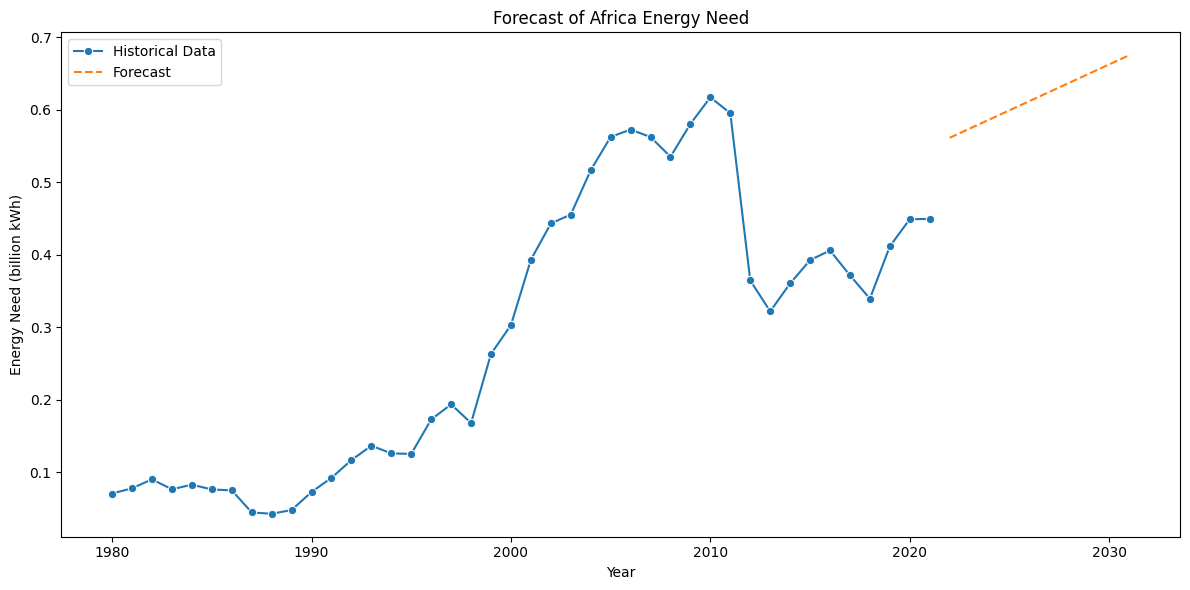

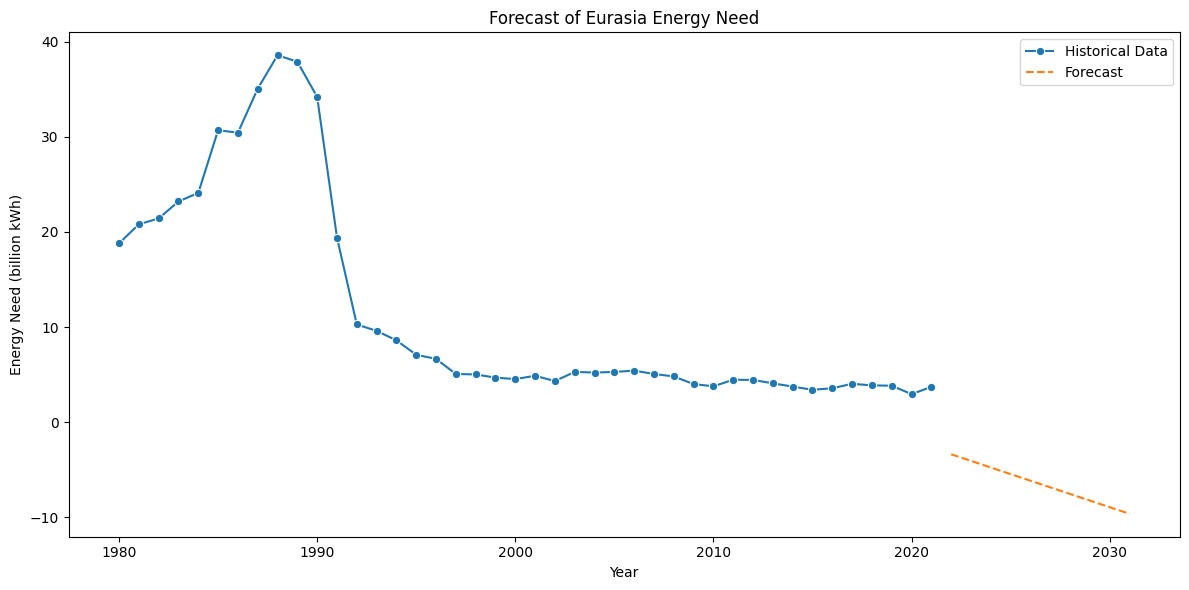

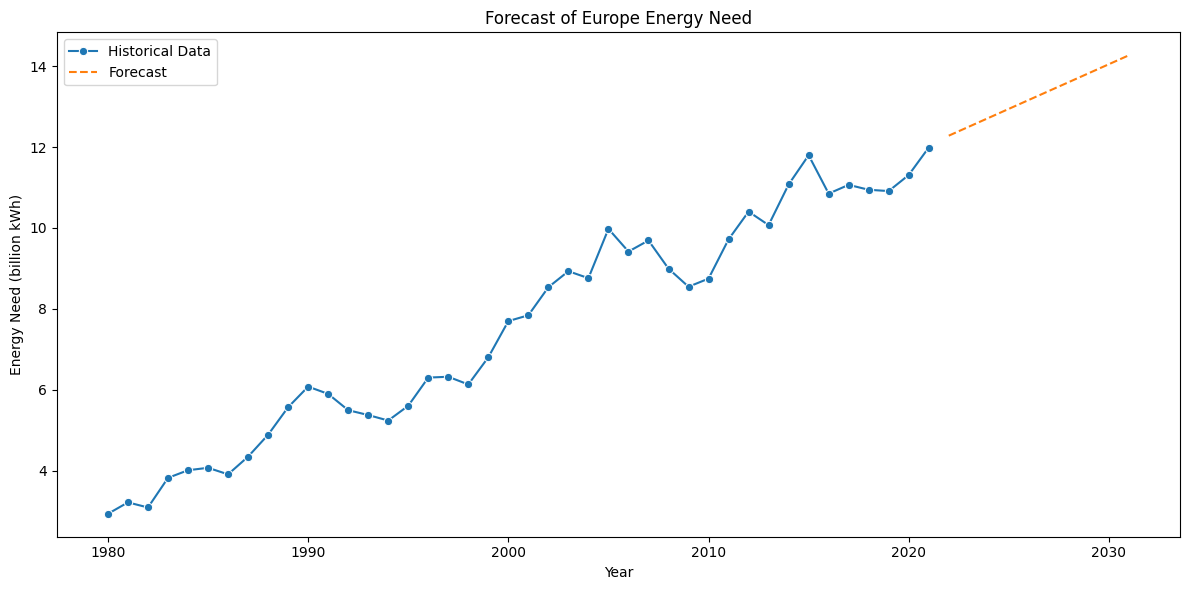

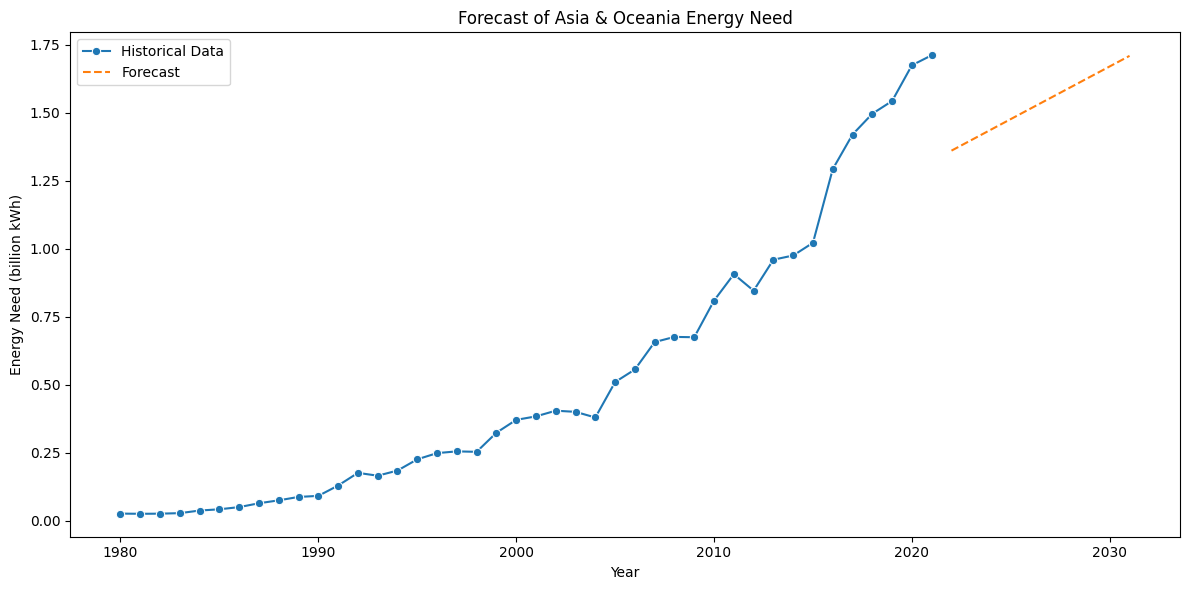

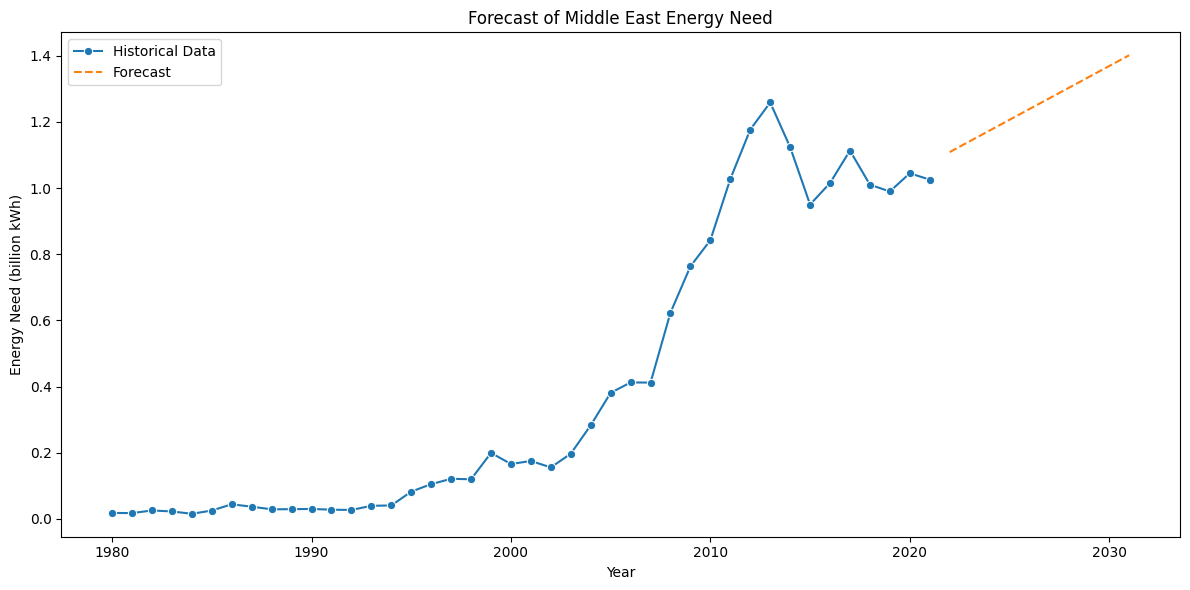

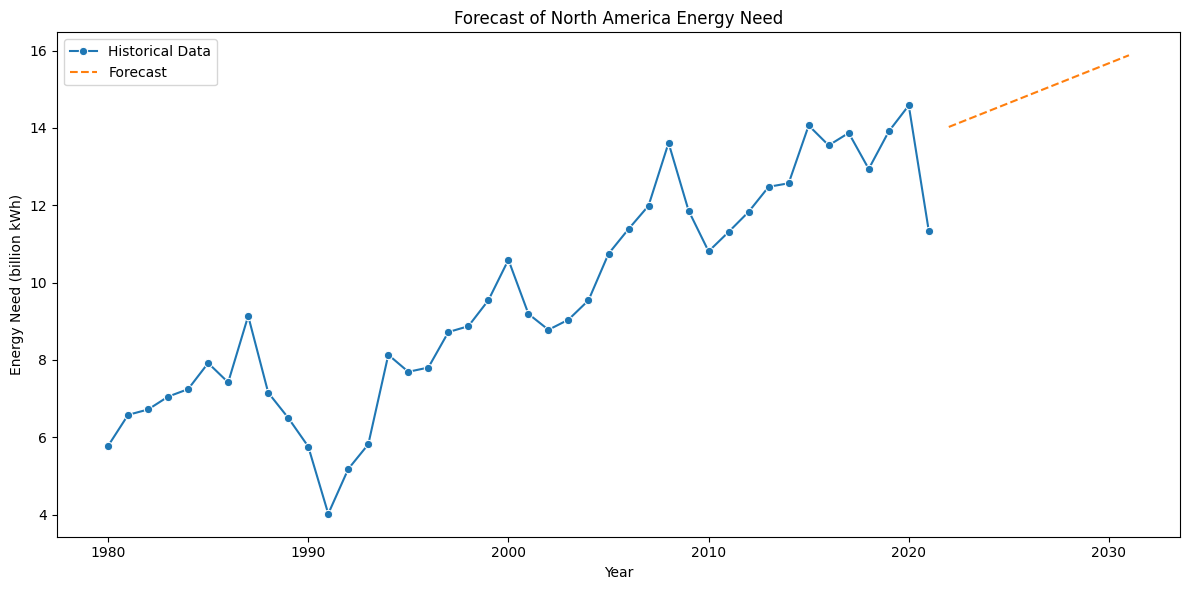

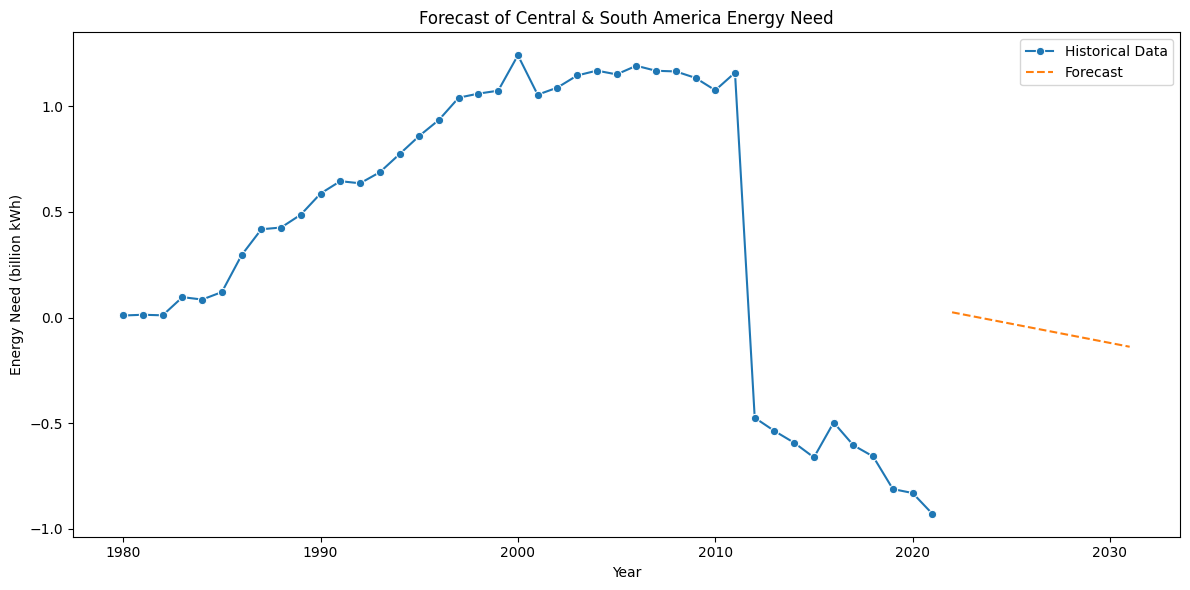

In [5]:
# Linear Regression
from sklearn.linear_model import LinearRegression

# Iterate over each region in region_dataframes
for region in region_dataframes:
    # Prepare the data for the specific region
    region_energy_df = region_dataframes[region]['energy need'].reset_index()
    region_energy_df.columns = ['Year', 'energy need']
    region_energy_df['Year'] = pd.to_numeric(region_energy_df['Year'])

    # Split the DataFrame into features (X) and target (y)
    X = region_energy_df[['Year']]
    y = region_energy_df['energy need']

    # Fit the regression model to the historical data
    regressor = LinearRegression()
    regressor.fit(X, y)

    # Prepare the forecast years
    max_year = X['Year'].max()
    forecast_years = np.arange(max_year + 1, max_year + 11).reshape(-1, 1)

    # Create a DataFrame for the forecast data
    forecast_df = pd.DataFrame(forecast_years, columns=['Year'])
    forecast_df['energy need forecast'] = regressor.predict(forecast_df[['Year']])

    # Combine historical and forecast data for plotting
    combined_df = pd.concat([region_energy_df, forecast_df], ignore_index=True)

    # Plotting the historical and forecasted 'energy need'
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Year', y='energy need', data=region_energy_df, marker='o', label='Historical Data')
    sns.lineplot(x='Year', y='energy need forecast', data=forecast_df, label='Forecast', linestyle='--')

    plt.title(f'Forecast of {region} Energy Need')
    plt.xlabel('Year')
    plt.ylabel('Energy Need (billion kWh)')
    plt.legend()
    plt.tight_layout()
    plt.show()

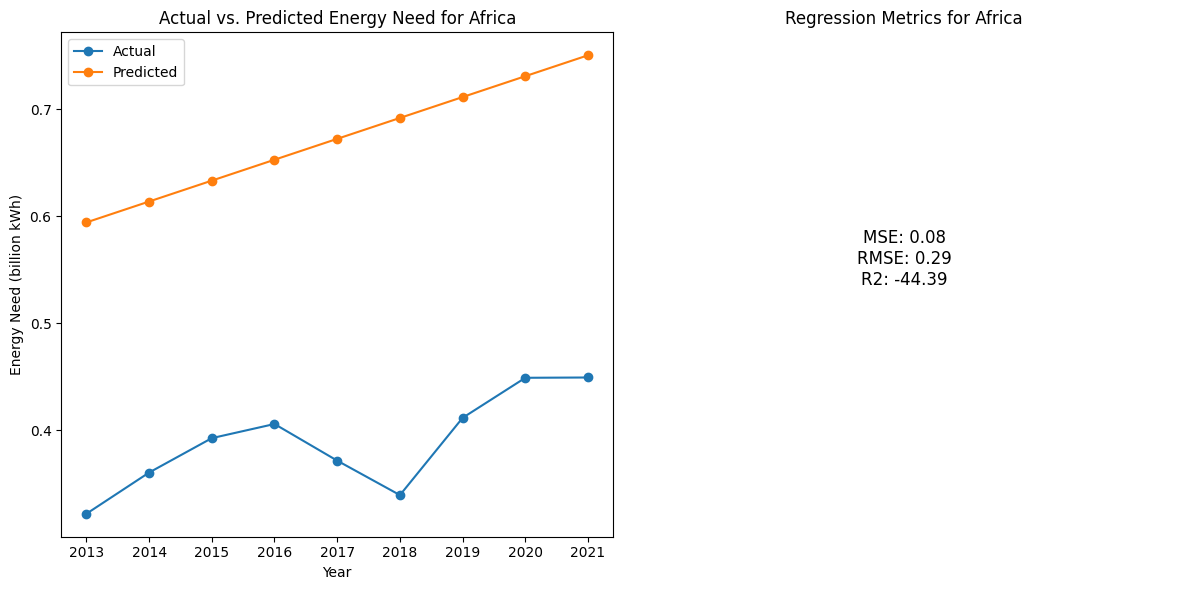

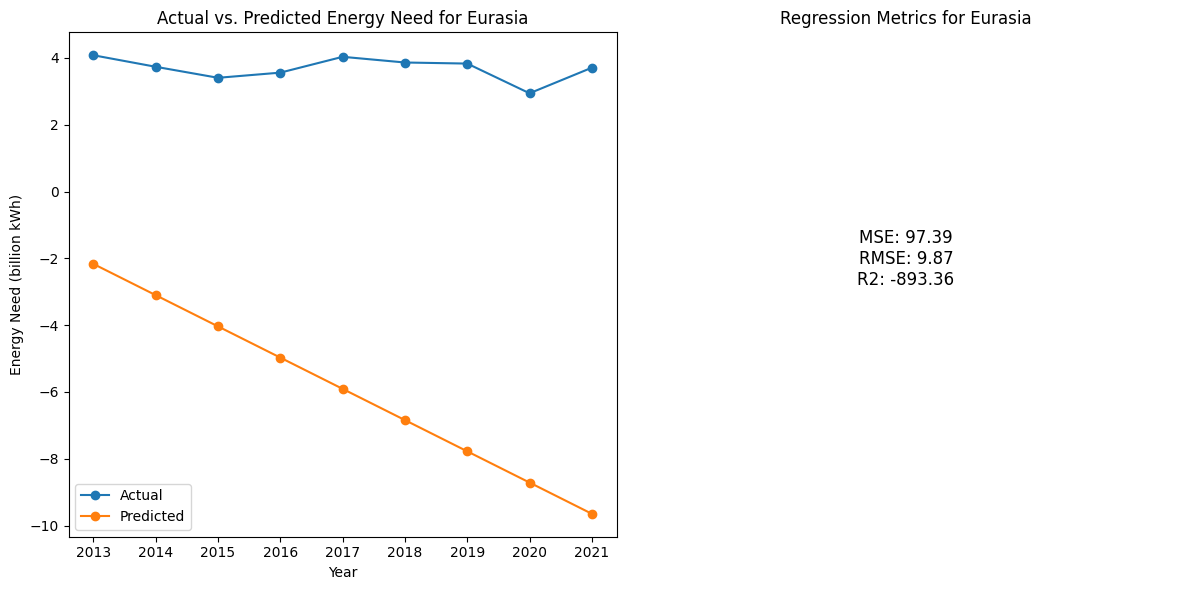

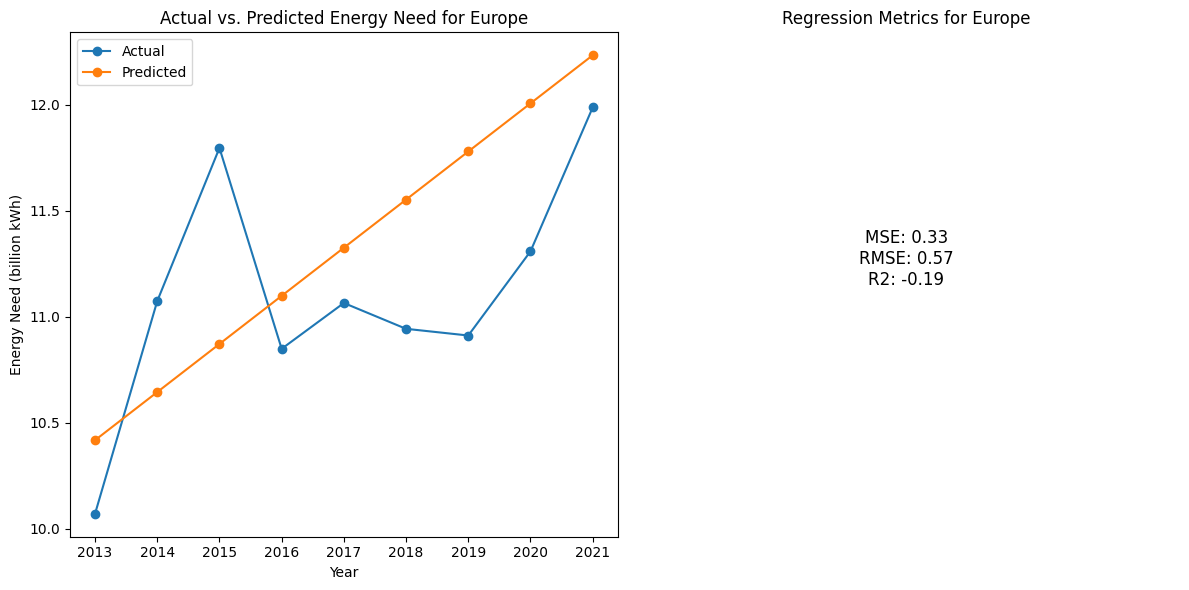

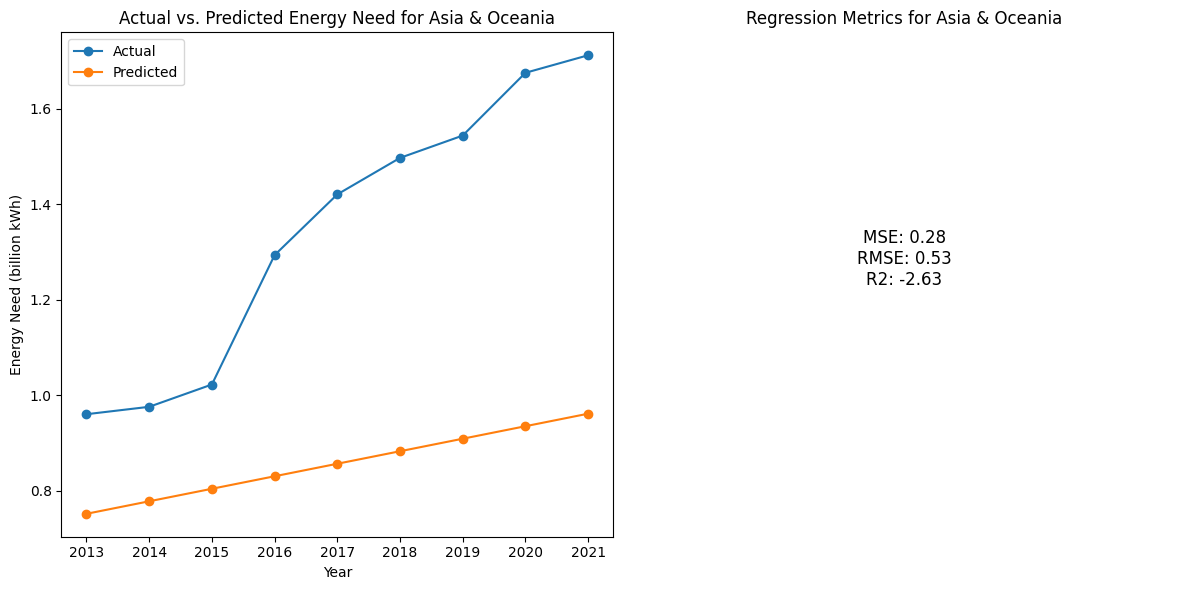

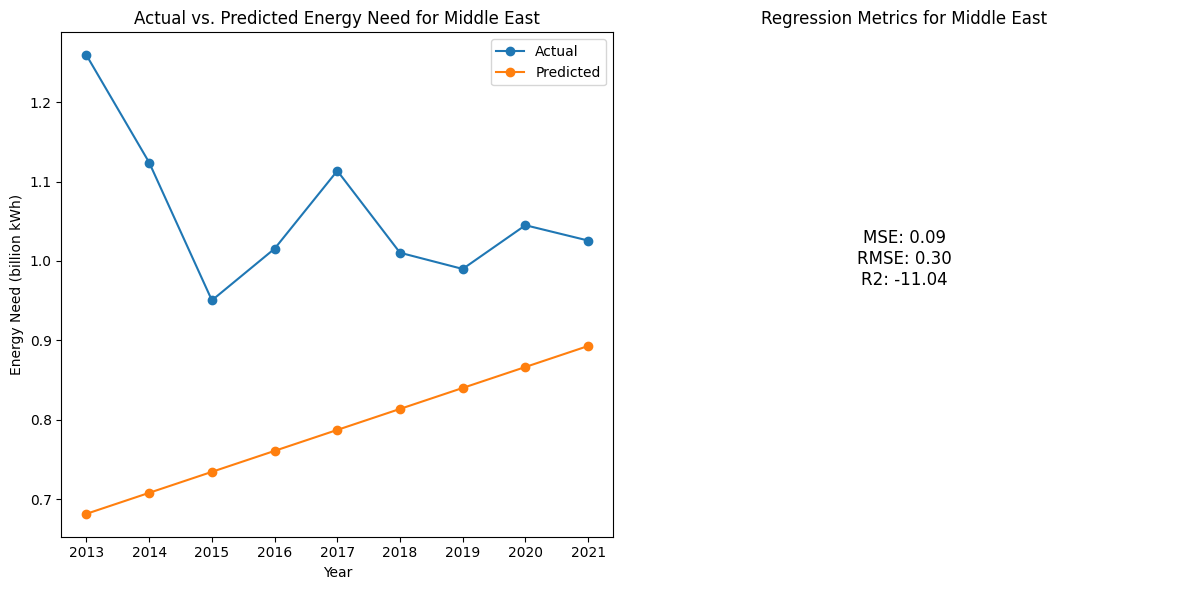

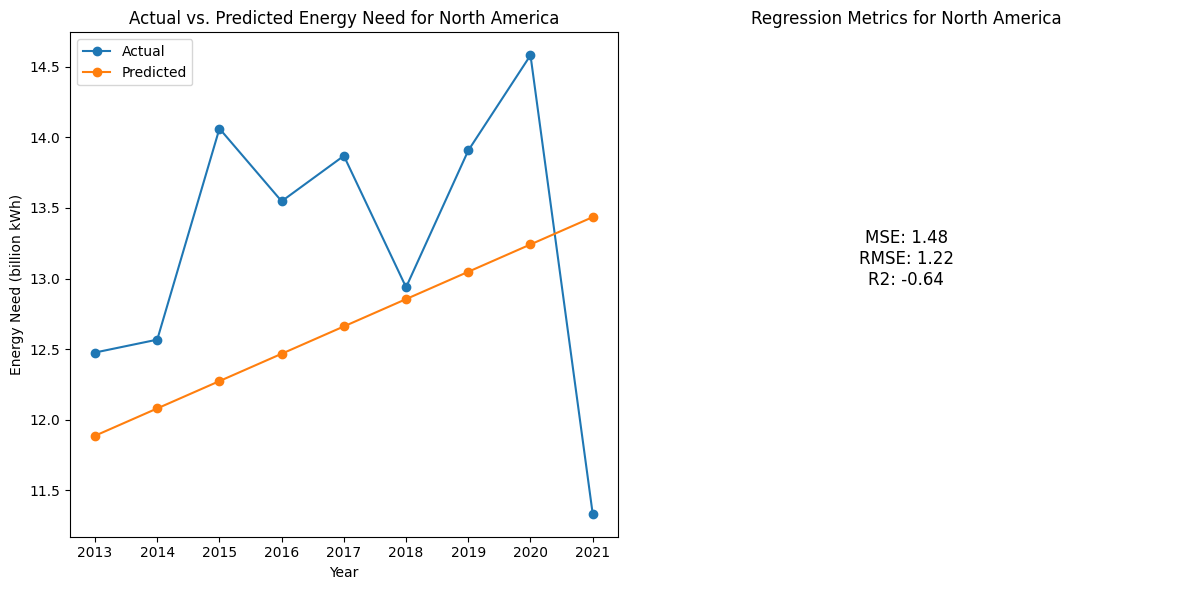

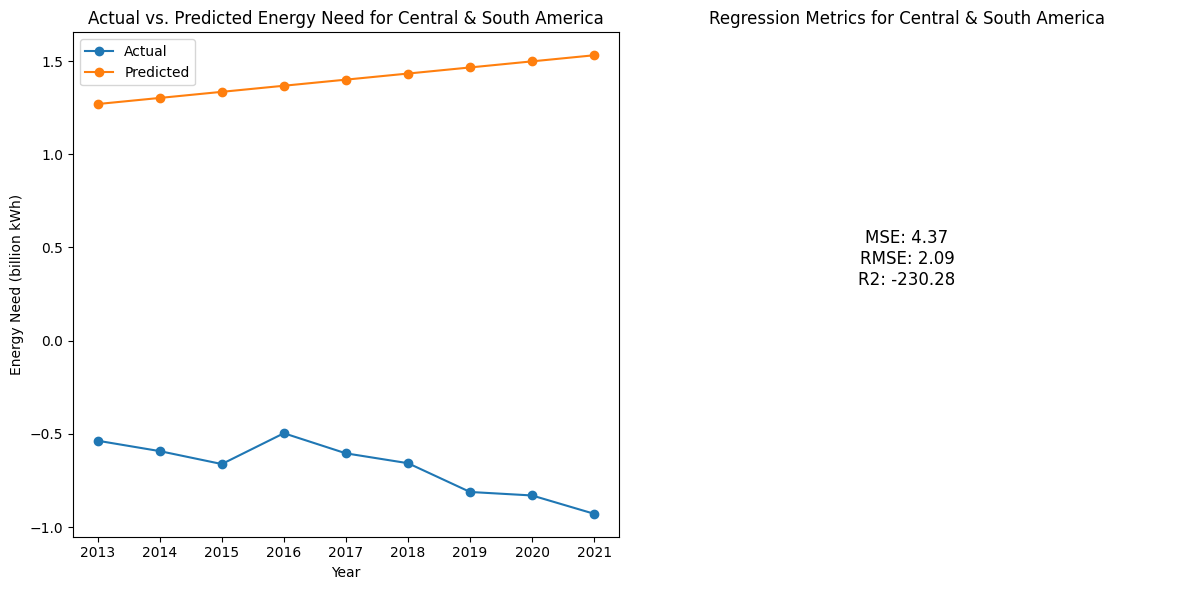

In [6]:
# Regression Metrics
from sklearn.metrics import mean_squared_error, r2_score

for region in region_dataframes:
    # Prepare the data for the specific region
    region_energy_df = region_dataframes[region]['energy need'].reset_index()
    region_energy_df.columns = ['Year', 'energy need']
    region_energy_df['Year'] = pd.to_numeric(region_energy_df['Year'])

    # Split the DataFrame into features (X) and target (y)
    X = region_energy_df[['Year']]
    y = region_energy_df['energy need']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Fit the regression model to the training data
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regressor.predict(X_test)

    # Calculate regression metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Plotting the Actual vs. Predicted Energy Need
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(X_test, y_test, marker='o', label='Actual')
    plt.plot(X_test, y_pred, marker='o', label='Predicted')
    plt.title(f'Actual vs. Predicted Energy Need for {region}')
    plt.xlabel('Year')
    plt.ylabel('Energy Need (billion kWh)')
    plt.legend()

    # Displaying the regression metrics
    plt.subplot(1, 2, 2)
    plt.text(0.5, 0.5, f'MSE: {mse:.2f}\nRMSE: {rmse:.2f}\nR2: {r2:.2f}', 
             fontsize=12, ha='center')
    plt.axis('off')
    plt.title(f'Regression Metrics for {region}')
    
    plt.tight_layout()
    plt.show()